In [62]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import sklearn

In [63]:
df_2012 = pd.read_csv('df_2012_for-train.csv')
df_2018 = pd.read_csv('df_2018_predictions.csv')

In [64]:
## Filtered for Outliers

df_2018.loc[df_2018.predicted > df_2018.predicted.quantile(0.95), "outlier"] = 1
df_2018.loc[df_2018.predicted < df_2018.predicted.quantile(0.05), "outlier"] = 1
df_2018[df_2018["outlier"] == 1].shape

(644, 332)

In [65]:
df_2018 = df_2018.drop(df_2018[df_2018.outlier == 1].index)
df_2018.reset_index(drop=True)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP,predicted,outlier
0,1,3,5,2,210000,8,1,4,0,1,...,2,1,2,2,2,2,1,0,23.255482,NaN
1,2,4,9,2,28000,5,1,6,1,1,...,1,1,1,1,1,2,1,15,6.722208,NaN
2,3,3,5,8,2100,2,1,4,0,3,...,4,1,2,2,2,1,2,40,20.126153,NaN
3,4,3,7,5,240000,8,2,6,1,1,...,2,1,2,1,2,2,2,5,6.486134,NaN
4,5,1,2,5,295000,8,3,6,0,1,...,4,1,2,1,2,2,1,0,20.194501,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,6431,1,1,18,132000,7,1,5,1,3,...,1,1,3,2,2,2,2,10,59.328137,NaN
5788,6432,4,8,14,130000,7,1,1,0,1,...,3,1,2,2,2,2,1,15,44.421108,NaN
5789,6433,3,7,1,1050,2,1,5,0,2,...,0,0,2,1,2,1,2,10,12.739449,NaN
5790,6434,3,5,2,122000,7,2,6,1,1,...,3,1,2,1,2,2,2,0,36.072038,NaN


In [75]:
df_2018["eui"] = df_2018['predicted'] / df_2018["SQFT"]

In [160]:
## Highest median energy use intensity by Principal Building Activity 
# PBA 15 = Food Service

df_2018.groupby("PBA").median().sort_values('eui', ascending=False).head()

,PUBID,REGION,CENDIV,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,BLDSHP,...,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP,predicted,outlier,eui
PBA,,,,,,,,,,,,,,,,,,,,,
26,3277.0,3.0,5.0,6050.0,3.0,3.0,5.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,10.0,16.432823,NaN,0.002233
15,3183.0,3.0,5.0,3500.0,2.0,1.0,5.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,5.0,8.493501,NaN,0.001598
1,3528.5,3.0,5.0,12000.0,4.0,3.0,5.0,0.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,10.0,17.266503,NaN,0.001308
12,3489.0,3.0,5.0,15750.0,4.0,1.0,4.0,0.0,3.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,15.0,22.626273,NaN,0.001252
17,4192.5,2.0,3.0,48250.5,5.5,1.0,4.0,0.0,2.0,5.0,...,1.0,2.0,2.0,2.0,2.0,2.0,20.0,59.756608,NaN,0.001207


In [214]:
## Renovations
## Renovation Variables:

# col_list = ['RENOV',
# 'RENCOS',
# 'RENADD',
# 'RENRDC',
# 'RENINT',
# 'RENRFF',
# 'RENWIN',
# 'RENHVC',
# 'RENLGT',
# 'RENPLB',
# 'RENELC',
# 'RENINS',
# 'RENSAF',
# 'RENSTR',
# 'RENOTH'
# ]

In [212]:
# df_2018['RENOV'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENCOS'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENADD'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENRDC'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENINT'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENRFF'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENWIN'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENHVC'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENLGT'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENPLB'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENELC'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENINS'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENSAF'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENSTR'].replace(to_replace=2, value=0, inplace=True)
# df_2018['RENOTH'].replace(to_replace=2, value=0, inplace=True)

In [213]:
# df_2018["retrofit"] = df_2018["RENOV"] + df_2018["RENCOS"] + df_2018["RENADD"] + df_2018['RENRDC'] + df_2018['RENINT'] + df_2018['RENRFF'] + df_2018['RENWIN'] + df_2018['RENHVC'] + df_2018['RENLGT'] + df_2018['RENPLB'] + df_2018['RENELC'] + df_2018['RENINS'] + df_2018['RENSAF'] + df_2018['RENSTR'] + df_2018['RENOTH']

In [196]:
# df_retrofit = df_2018.loc[:,['CENDIV','retrofit',"YRCONC"]]

In [211]:
## Higher retrofit, better/lower yrconc, worse

# df_retrofit.groupby("CENDIV").mean().sort_values('YRCONC')

In [223]:
# df_food_service = df_2018[(df_2018.PBA == 15) | (df_2018.PBA == 16)]
df_food_service = df_2018[(df_2018.PBA == 15)]

In [224]:
df_food_service.drop(df_food_service[df_food_service.predicted < -50].index, inplace=True) # without outlier
# df_food_service[df_food_service.predicted < -50]

C:\Users\evaze\AppData\Local\Temp\ipykernel_17932\4274909528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food_service.drop(df_food_service[df_food_service.predicted < -50].index, inplace=True) # without outlier


In [225]:
# df_food_service[df_food_service["BOOSTWT"]==1]

<AxesSubplot:xlabel='BOOSTWT', ylabel='eui'>

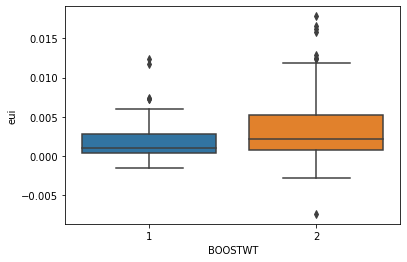

In [226]:
sns.boxplot(data=df_food_service, x='BOOSTWT', y='eui')

In [227]:
import scipy
import statsmodels
# import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind

In [228]:
boost = df_food_service[df_food_service["BOOSTWT"] == 1]
no_boost = df_food_service[df_food_service["BOOSTWT" ] == 2]

In [229]:
ttest_ind(boost["eui"],no_boost["eui"])

Ttest_indResult(statistic=-2.60253516223327, pvalue=0.009906811351762005)

In [230]:
model = smf.ols("eui ~ BOOSTWT", data = df_food_service)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    eui   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.773
Date:                Wed, 13 Apr 2022   Prob (F-statistic):            0.00991
Time:                        18:31:11   Log-Likelihood:                 898.13
No. Observations:                 214   AIC:                            -1792.
Df Residuals:                     212   BIC:                            -1786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.001      0.650      0.5